# Linear Regression 
```
Shivam Kumaran 
SC17b122
Date - 6 Nov 2020
Computational Astrophysics Lab - II - 05
```

## Importing Required Modules

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec as gs 
import seaborn as sns
from scipy.optimize import curve_fit
plt.rcdefaults()
#sns.set_style('darkgrid')
#sns.set_theme(context='notebook')
plt.style.use('seaborn-dark-palette')


## Loading Data

In [2]:
data = np.loadtxt('data1' , dtype = 'f4,f4,f4')
data = np.asarray([list(d) for d in data])
x = data[:,0]
y = data[:,1]
sigma = data[:,2]

## Linear regression routine

In [21]:
def linear_regression(x,y,sigma):
    '''
    Fits data(x , y) for the linear function - 
    y = a1 + a2*x

    Use error propogation for calculation of 
    error in a1 and a1, using given error sigma

    returns a1,a1, error(a1) , error(a1)
    '''
    s = sum([1/(sig**2) for sig in sigma])
    sum_x = sum([(xi/(sigma_i**2)) for xi , sigma_i in zip(x,sigma)])
    sum_y = sum([(xi/(sigma_i**2)) for xi , sigma_i in zip(y,sigma)])
    sum_x_sq = sum([(xi**2/(sigma_i**2)) for xi , sigma_i in zip(x,sigma)])
    sum_x_y = sum([(xi*yi/(sigma_i**2)) for xi ,yi, sigma_i in zip(x,y,sigma)])

    # Parameters Calculation
    denom = s*sum_x_sq - (sum_x**2)
    a1 = (sum_y*sum_x_sq - sum_x*sum_x_y)/denom
    a2 = ( s*sum_x_y - sum_x*sum_y ) /denom

    # Error Calculation
    sigma_a1_sq = sum([(((sum_x_sq-x_i*sum_x))**2)/(sigma_i**2) for x_i,sigma_i in zip(x,sigma)])/(denom**2)
    sigma_a2_sq = sum([((s*x_i-sum_x)**2)/(sigma_i**2) for x_i , sigma_i in zip(x,sigma)])/(denom**2)

    err_a1 = sigma_a1_sq**0.5
    err_a2 = sigma_a2_sq**0.5


    return (a1,a2 , err_a1 , err_a2)


### Parameters Calculation

In [37]:
a1 , a2 ,err_a1, err_a2 = linear_regression(x,y,sigma)
print('_________Using Our Linear regression routine_________ \n \n')
print('a1 = {:.4f} , error(a1) = {:.4f}'.format(a1,err_a1))
print('a2 = {:.4f} , error(a2) = {:.4f}'.format(a2,err_a2))


_________Using Our Linear regression routine_________ 
 

a1 = 1.6533 , error(a1) = 0.5743
a2 = 0.4999 , error(a2) = 0.0196


#### Comparing with Scipy Curve_fit 

In [39]:
params , perr = curve_fit(linear_model,x,y , p0=[0,0])
err = np.sqrt(np.diag(perr))
print('_________Using Scipy Curve-fit_________\n \n')
print('a1 = {:.4f} , error(a1) = {:.4f}'.format(params[0],err[0]))
print('a2 = {:.4f} , error(a2) = {:.4f}'.format(params[1],err[1]))

_________Using Scipy Curve-fit_________
 

a1 = 1.6533 , error(a1) = 0.5749
a2 = 0.4999 , error(a2) = 0.0196


## Evaluation of Fit

### Values from our best-fit model

In [27]:
def linear_model(x,a1,a2):
    val = a1+a2*x
    return(val)

y_mod = linear_model(x,a1,a2)

## $\chi^2$ Test

In [42]:
chi_sq_val = [((y_mi-y_i)**2)/(sigma_i**2) for y_mi , y_i , sigma_i in zip(y_mod,y,sigma)]
chi_sq = sum(chi_sq_val)
print('Chi Sq:{:.4f}'.format(chi_sq))
print('DOF :' , len(y)-2)
reduced_chi_sq = chi_sq/(len(y)-2)
print('Reduced chi sq:{:.4f}'.format(reduced_chi_sq))

Chi Sq:48.1060
DOF : 48
Reduced chi sq:1.0022


## Ploting Result

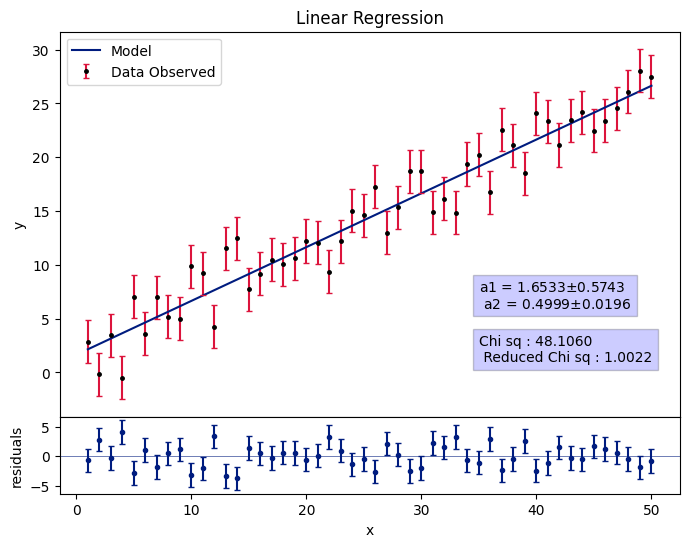

In [43]:
fig = plt.figure(figsize=(8,6) , constrained_layout=False)
spec = gs.GridSpec(ncols=1 , nrows=2 , height_ratios=[1,0.2] , hspace=0)
ax = fig.add_subplot(spec[0,0])
ax.plot(x,y_mod)
ax.errorbar(x,y,yerr=sigma , fmt='.' , capsize =2 , ecolor='crimson' , color='k' , markersize=5)
ax.text(35,6 , 'a1 = {:.4f}$\pm${:.4f} \n a2 = {:.4f}$\pm${:.4f}'.format(a1,err_a1 , a2, err_a2) , 
        bbox = {'facecolor':'blue' , 'alpha':0.2} , fontsize = 10)
ax.text(35,1 , 'Chi sq : {:.4f} \n Reduced Chi sq : {:.4f}'.format(chi_sq,reduced_chi_sq) , 
        bbox = {'facecolor':'blue' , 'alpha':0.2, } , fontsize = 10)
ax.legend(['Model' , 'Data Observed'])
ax.set_ylabel('y')

#plt.style.use('seaborn-darkgrid')
res_plot = fig.add_subplot(spec[1,0] , sharex = ax)
#res_plot.step(x,chi_sq_val , where= 'mid')

res_plot.set_ylabel(r'$y-y_{mod}$')
res_plot.set_xlabel('x')
res_plot.errorbar(x, y_mod-y , yerr = sigma , fmt='.' , capsize=2)
res_plot.axhline(y=0 , linewidth=0.4)
ax.set_title('Linear Regression')
plt.show()
